In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Step 1: Load and Analyze the Dataset
# Load the student dataset
student_df = pd.read_csv("student_data.csv")

In [4]:
# Perform exploratory data analysis (EDA)
print(student_df.head())  # Display the first few rows of the dataset
print(student_df.describe())  # Summary statistics of the dataset


           Name  Age  Gender  Computer Network  Web Computing  \
0  Advik Sharma   20  Female                52             89   
1  Advik Sharma   19  Female                90             70   
2  Aayan Sharma   21    Male                51             70   
3  Aaryan Patel   20  Female                98             61   
4   Nidhi Patel   21    Male                50             71   

   Machine Learning  Data Warehouse and Mining  Statistics  Total  Percentage  \
0                83                         89          45    358        71.6   
1                87                         78          45    370        74.0   
2                57                         64          61    303        60.6   
3                82                         89          87    417        83.4   
4                97                         38          45    301        60.2   

       Result  
0  Successful  
1  Successful  
2  Successful  
3  Successful  
4  Successful  
                Age  Compu

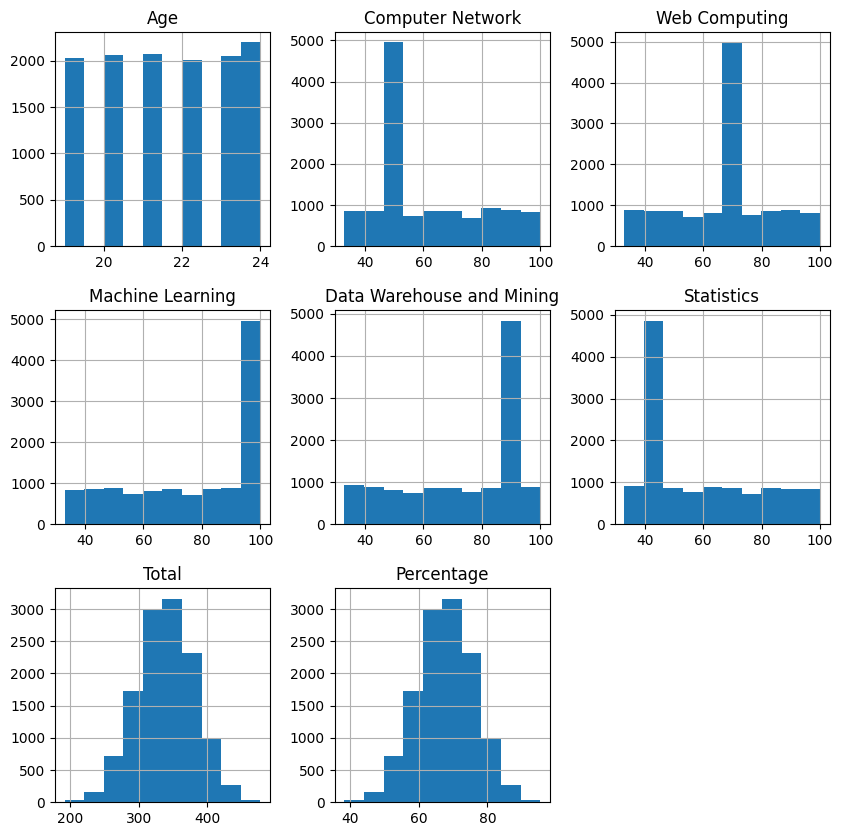

In [5]:
# Visualize the dataset
student_df.hist(figsize=(10, 10))
plt.show()

In [6]:
# Step 2: Load and Analyze the Text File
# Load the text file
with open("sem5.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [7]:
# Analyze the text file
print(text)

Computer Network:

OSI Model
TCP/IP Protocol Suite
Routing and Switching
Network Security
Web Computing:

HTML, CSS, JavaScript
Client-Server Architecture
HTTP Protocol
Web Development Frameworks (e.g., Django, Flask)
Artificial Intelligence:

Machine Learning Algorithms
Neural Networks
Natural Language Processing
Computer Vision
Data Warehouse and Mining:

Data Warehousing Concepts
ETL (Extract, Transform, Load) Processes
Data Mining Techniques
OLAP (Online Analytical Processing)
Statistics for AI and Data Science:

Probability Distributions
Hypothesis Testing
Regression Analysis
Bayesian Inference



In [8]:
# Generate a word cloud to visualize important topics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

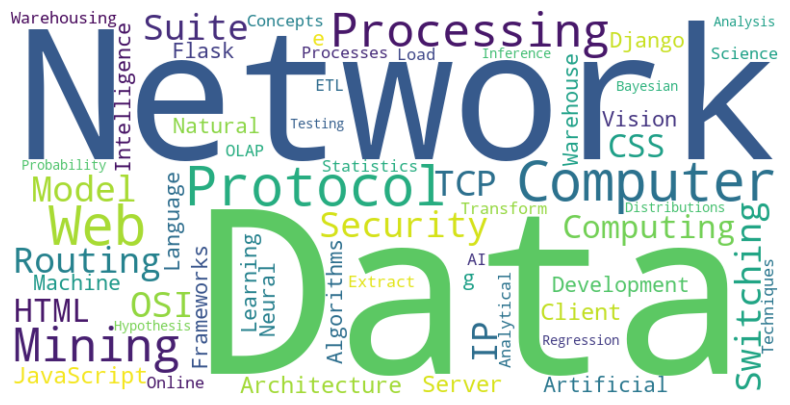

In [9]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
# Step 3: Train a Model
# Define a function to determine the weak subject based on marks
def determine_weak_subject(row):
    subject_marks = row[['Computer Network', 'Web Computing', 'Machine Learning', 'Data Warehouse and Mining', 'Statistics']]
    min_marks = subject_marks.min()
    weak_subject = subject_marks.idxmin()
    return weak_subject

In [12]:
# Create the 'Weak Subject' attribute
student_df['Weak Subject'] = student_df.apply(determine_weak_subject, axis=1)

In [13]:
# Prepare the features (marks in each subject) and target (weak subject)
X = student_df[['Computer Network', 'Web Computing', 'Machine Learning', 'Data Warehouse and Mining', 'Statistics']]
y = student_df['Weak Subject']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Step 4: Test the Model
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [17]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9839098954143202


In [25]:
import tkinter as tk

# Function to recommend topics based on weak subject
def recommend_topics(weak_subject):
    # Load the text file
    with open("sem5.txt", "r", encoding="utf-8") as file:
        text = file.read()

    # Split the text into lines and filter based on the weak subject
    lines = text.split("\n")
    relevant_topics = [line.strip() for line in lines if weak_subject.lower() in line.lower()]

    # Generate additional topics related to the weak subject
    additional_topics = []
    for line in lines:
        if any(word in line.lower() for word in ["introduction", "overview", "basics", "fundamentals"]):
            additional_topics.append(line.strip())

    # Ensure we have at least 4-5 topics to recommend
    recommended_topics = relevant_topics[:min(len(relevant_topics), 4)] + additional_topics[:min(len(additional_topics), 5)]
    return recommended_topics

# Function to handle button click event
def on_submit():
    # Get student's details from the input fields
    name = name_entry.get()
    age = age_entry.get()
    gender = gender_var.get()

    # Get the weak subject predicted by the model (For now, let's assume it's hard-coded)
    weak_subject = "Computer Network"  # Example weak subject

    # Recommend topics based on weak subject
    topics = recommend_topics(weak_subject)

    # Display recommended topics in the window
    topics_text = "\n".join(topics)
    topics_display.config(text=topics_text)

# Create the GUI window
window = tk.Tk()
window.title("Student Recommendation System")

# Add input fields for student details
tk.Label(window, text="Name:").grid(row=0, column=0)
name_entry = tk.Entry(window)
name_entry.grid(row=0, column=1)

tk.Label(window, text="Age:").grid(row=1, column=0)
age_entry = tk.Entry(window)
age_entry.grid(row=1, column=1)

tk.Label(window, text="Gender:").grid(row=2, column=0)
gender_var = tk.StringVar(window)
gender_var.set("Male")
gender_options = ["Male", "Female"]
gender_menu = tk.OptionMenu(window, gender_var, *gender_options)
gender_menu.grid(row=2, column=1)

# Add input fields for marks in each subject
marks_label = tk.Label(window, text="Marks in Each Subject:")
marks_label.grid(row=3, column=0, columnspan=2)

mark_entries = []
subjects = ['Computer Network', 'Web Computing', 'Machine Learning', 'Data Warehouse and Mining', 'Statistics']
for i, subject in enumerate(subjects):
    tk.Label(window, text=subject + ":").grid(row=i+4, column=0)
    entry = tk.Entry(window)
    entry.grid(row=i+4, column=1)
    mark_entries.append(entry)

# Add submit button
submit_button = tk.Button(window, text="Submit", command=on_submit)
submit_button.grid(row=len(subjects)+4, column=0, columnspan=2)

# Add label to display recommended topics
topics_display = tk.Label(window, text="")
topics_display.grid(row=len(subjects)+5, column=0, columnspan=2)

# Run the GUI application
window.mainloop()
